# Exercise 0.1

In [458]:
import pandas as pd
df = pd.read_csv("data/Steam Top 100 Played Games - List.csv")
df.head()

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."


In [459]:
df.shape

(100, 8)

In [460]:
df.columns

Index(['Rank', 'Name', 'Thumbnail URL', 'Store Link', 'Price',
       'Current Players', 'Peak Today', 'Genre Tags'],
      dtype='object')

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             100 non-null    int64 
 1   Name             100 non-null    object
 2   Thumbnail URL    100 non-null    object
 3   Store Link       100 non-null    object
 4   Price            100 non-null    object
 5   Current Players  100 non-null    object
 6   Peak Today       100 non-null    object
 7   Genre Tags       100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [462]:
#casting number of players to int
df["Current Players"] = df["Current Players"].str.replace(",","").astype(int)
df["Peak Today"] = df["Peak Today"].str.replace(",","").astype(int)
df["Price"] = df["Price"].str.replace("Free To Play","0")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             100 non-null    int64 
 1   Name             100 non-null    object
 2   Thumbnail URL    100 non-null    object
 3   Store Link       100 non-null    object
 4   Price            100 non-null    object
 5   Current Players  100 non-null    int64 
 6   Peak Today       100 non-null    int64 
 7   Genre Tags       100 non-null    object
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [ ]:
#removing pund symbol
df["Price"] = df["Price"].str.replace("£","").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             100 non-null    int64  
 1   Name             100 non-null    object 
 2   Thumbnail URL    100 non-null    object 
 3   Store Link       100 non-null    object 
 4   Price            100 non-null    float64
 5   Current Players  100 non-null    int64  
 6   Peak Today       100 non-null    int64  
 7   Genre Tags       100 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [464]:
import duckdb
games_top_10 = duckdb.query(
    """--sql
    SELECT name as Game, "peak today" as Players, price
    from df
    ORDER BY Players DESC
"""
).df().head(10).set_index("Game")
games_top_10

,Players,Price
Game,,
Counter-Strike 2,1489929,0.00
PUBG: BATTLEGROUNDS,765150,0.00
Dota 2,715295,0.00
Marvel Rivals,565653,0.00
Path of Exile 2,288757,23.93
NARAKA: BLADEPOINT,208643,0.00
Grand Theft Auto V,207117,14.80
Rust,205358,34.99
Palworld,165613,24.99


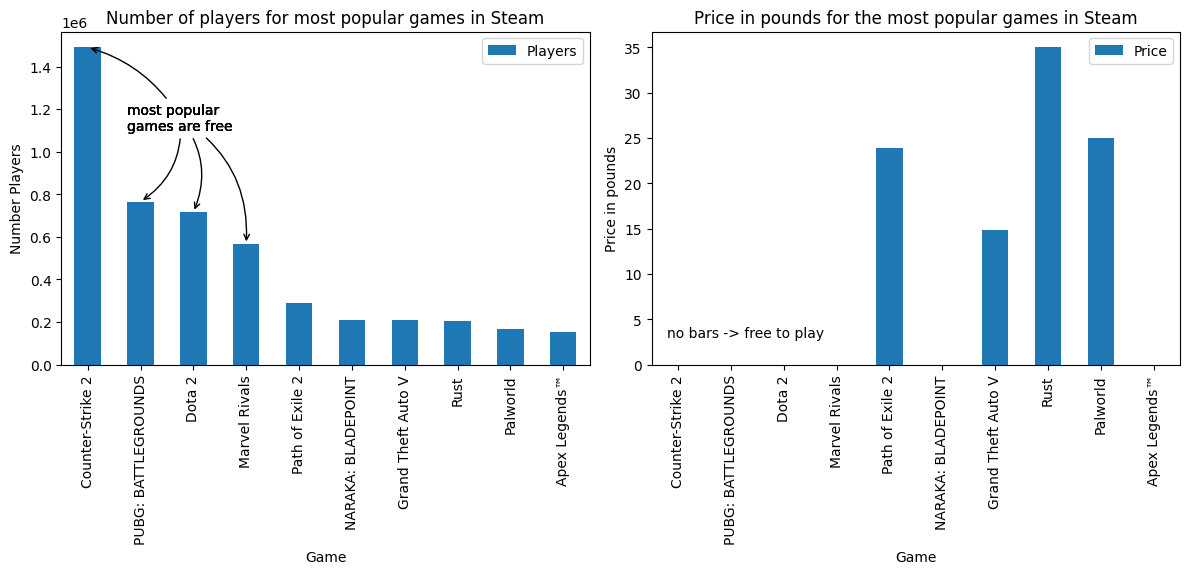

In [475]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

games_top_10.plot(kind="bar", y="Players", ax=ax1)
games_top_10.plot(kind="bar", y="Price", ax=ax2)

ax1.set(title="Number of players for most popular games in Steam", ylabel="Number Players", xlabel="Game")
ax2.set(title="Price in pounds for the most popular games in Steam", ylabel="Price in pounds", xlabel="Game")

containers = [0,1,2,3]

for container in containers:
        xy = (ax1.containers[0][container].get_x()+0.25, ax1.containers[0][container].get_height())
        rad = 0.2 if xy[0] < 0.25 else -0.3
        arrowprops = dict(arrowstyle = "->", linewidth = 1, connectionstyle = f"arc3, rad={rad}")
        ax1.annotate(
        text = "most popular\ngames are free", 
        arrowprops= arrowprops, 
        xy=xy, 
        xytext=(0.75, 1100000))

#ax.annotate(text = "Swedes", xy= (1, 32), arrowprops=arrowprops, xytext = (.8, 40))
ax2.annotate(text = "no bars -> free to play", xy=(-0.2, 3))

fig.tight_layout()
fig.savefig("../figures/ex0_1_a.png")

## Genres

In [430]:
df_genres = duckdb.query(
    """--sql
    SELECT "Genre tags" as "Genre Tags", "peak today" as Players
    from df
    ORDER BY Players DESC
"""
).df()
df_genres

,Genre Tags,Players
0,"Free to Play, Simulation, Vehicular Combat, Co...","95,217"
1,"FPS, Multiplayer, Shooter, Singleplayer, Action","92,839"
2,"FPS, PvP, eSports, Multiplayer, Shooter, Tacti...","81,646"
3,"Online Co-Op, PvE, Multiplayer, Action, Co-op","81,203"
4,"Free to Play, Hero Shooter, Multiplayer, FPS, ...","78,156"
...,...,...
95,"Farming Sim, Pixel Graphics, Life Sim, Multipl...","119,555"
96,"Free to Play, FPS, Multiplayer, Extraction Sho...","111,888"
97,"RPG, Character Customisation. Choices Matter","108,839"
98,"Free to Play, Clicker, Singleplayer, 2D, Casua...","101,034"


In [ ]:
df_genres["Genre Tags"] = df_genres["Genre Tags"].str.split(",")
df_genres

,Genre Tags,Players
0,"[Free to Play, Simulation, Vehicular Combat,...","95,217"
1,"[FPS, Multiplayer, Shooter, Singleplayer, ...","92,839"
2,"[FPS, PvP, eSports, Multiplayer, Shooter, ...","81,646"
3,"[Online Co-Op, PvE, Multiplayer, Action, C...","81,203"
4,"[Free to Play, Hero Shooter, Multiplayer, F...","78,156"
...,...,...
95,"[Farming Sim, Pixel Graphics, Life Sim, Mul...","119,555"
96,"[Free to Play, FPS, Multiplayer, Extraction...","111,888"
97,"[RPG, Character Customisation. Choices Matter]","108,839"
98,"[Free to Play, Clicker, Singleplayer, 2D, ...","101,034"


In [ ]:
df_all_genres = df_genres["Genre Tags"].explode("Genre Tags").to_frame()
df_all_genres

,Genre Tags
0,Free to Play
1,Simulation
2,Vehicular Combat
3,Combat
4,World War II
...,...
1764,Trading
1765,Realistic
1766,Fast-Paced
1767,Moddable


In [ ]:
df_sum_genre = df_all_genres.value_counts().iloc[1:6].to_frame(name='Number')
df_sum_genre

#this for a reason I don't get gives the names in with parantheses

,Number
Genre Tags,
Multiplayer,69
Action,62
Singleplayer,55
Co-op,39
Adventure,38


In [ ]:
#instead do a groupby I don't get that
df_top5_genres= df_all_genres.groupby("Genre Tags").size().sort_values(ascending=False).iloc[1:6].to_frame(name="Number")
df_top5_genres

,Number
Genre Tags,
Multiplayer,69
Action,62
Singleplayer,55
Co-op,39
Adventure,38


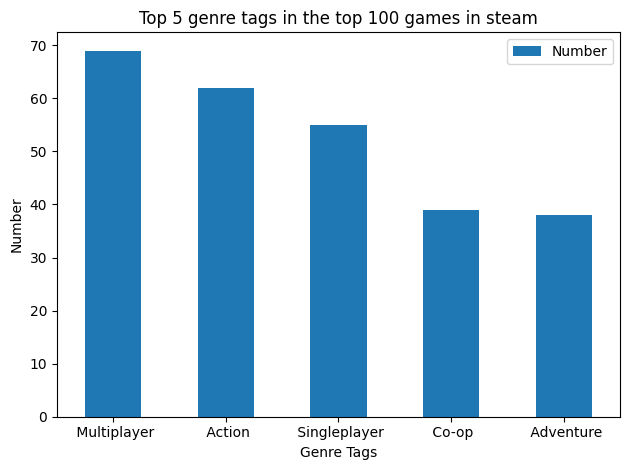

In [ ]:
ax = df_top5_genres.plot(kind="bar", title= "Top 5 genre tags in the top 100 games in steam")
ax.set_ylabel("Number")
ax.tick_params(axis="x", labelrotation=0)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("../figures/ex0_1_b")

## Histogram

In [487]:
df_games_tags = duckdb.query(
    """--sql
    SELECT name as Game, "Genre Tags"
    from df
"""
).df().set_index("Game")
df_games_tags

,Genre Tags
Game,
Counter-Strike 2,"FPS, Shooter, Multiplayer, Competitive, Action..."
PUBG: BATTLEGROUNDS,"Survival, Shooter, Battle Royale, Multiplayer,..."
Dota 2,"Free to Play, MOBA, Multiplayer, Strategy, eSp..."
Marvel Rivals,"Free to Play, Multiplayer, Hero Shooter, Third..."
Path of Exile 2,"Action RPG, Hack and Slash, RPG, Action, Souls..."
...,...
Sid Meier's Civilization® V,"Turn-Based Strategy, Strategy, Turn-Based, Mul..."
Counter-Strike,"Action, FPS, Multiplayer, Shooter, Classic, Te..."
Cities: Skylines,"City Builder, Simulation, Building, Management..."


In [488]:
df_games_tags["Genre Tags"] = df_games_tags["Genre Tags"].str.split(",")
df_games_tags

,Genre Tags
Game,
Counter-Strike 2,"[FPS, Shooter, Multiplayer, Competitive, A..."
PUBG: BATTLEGROUNDS,"[Survival, Shooter, Battle Royale, Multipla..."
Dota 2,"[Free to Play, MOBA, Multiplayer, Strategy,..."
Marvel Rivals,"[Free to Play, Multiplayer, Hero Shooter, T..."
Path of Exile 2,"[Action RPG, Hack and Slash, RPG, Action, ..."
...,...
Sid Meier's Civilization® V,"[Turn-Based Strategy, Strategy, Turn-Based, ..."
Counter-Strike,"[Action, FPS, Multiplayer, Shooter, Classi..."
Cities: Skylines,"[City Builder, Simulation, Building, Manage..."


In [495]:
df_hist = df_games_tags.explode("Genre Tags").groupby("Game").size().to_frame(name="num_tags").sort_values("num_tags", ascending=False)
df_hist

,num_tags
Game,
7 Days to Die,21
Palworld,21
STALCRAFT: X,21
SCUM,21
Rust,21
...,...
The Witcher 3: Wild Hunt,4
The Elder Scrolls V: Skyrim Special Edition,4
Hunt: Showdown 1896,3


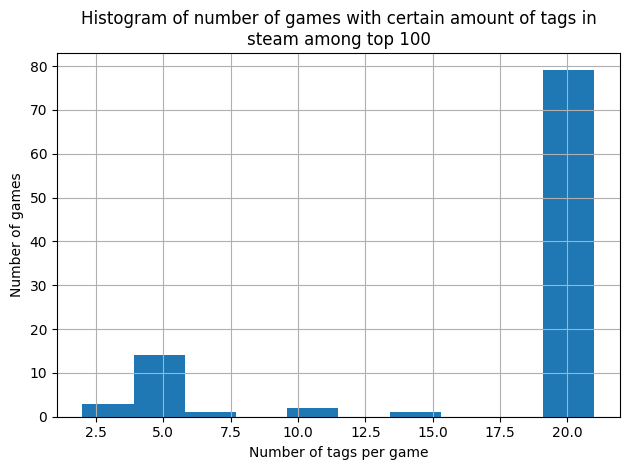

In [522]:
df_hist.hist()
plt.title("Histogram of number of games with certain amount of tags in\nsteam among top 100")
plt.xlabel("Number of tags per game")
plt.ylabel("Number of games")
plt.tight_layout()
plt.savefig("../figures/ex0_1_c")